Um später unser model bewerten zu können brauchen wir ein base line model. Diese ist in unserem Falle eine einfache lineare Regression.
Ich konzentriere mich dabei vorallem auf die folgenden Variablen:
- Schiffe
- Feiertage
- Croissants
- Konditorei

In [6]:
import pandas as pd
import numpy as np
# import the stats packages i need
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [7]:
#import the training and validation data
train = pd.read_csv('../../0_DataPreparation/Trainingsdaten.csv')
#convert the ship colum from True and False to 1 and 0
train['Ship'] = train['Ship'].astype(int)
#add a colum with true/false for the day before a Feiertag
train['Feiertag-1'] = train['Feiertag'].shift(1)
print(train.head())
validierung = pd.read_csv('../../0_DataPreparation/Validierungsdaten.csv')
validierung['Ship'] = validierung['Ship'].astype(int)
validierung['Feiertag-1'] = validierung['Feiertag'].shift(1)

        Datum        Brot   Broetchen   Croissant  Konditorei      Kuchen  \
0  2013-07-01  148.828353  535.856285  201.198426   65.890169  317.475875   
1  2013-07-02  159.793757  546.780787  265.261254   74.543917  383.628682   
2  2013-07-03  111.885594  427.343259  210.260241   69.262728  305.523072   
3  2013-07-04  168.864941  454.859641  190.686641   61.490175  308.408168   
4  2013-07-05  171.280754  492.818804  181.644870   86.759861  355.518770   

   Saisonbrot  Umsatz_total  Temp_Very_Cold  Temp_Cold  ...  Sonntag   VPI  \
0         0.0          1269             0.0        0.0  ...        0  98.9   
1         0.0          1430             0.0        0.0  ...        0  98.9   
2         0.0          1124             0.0        0.0  ...        0  98.9   
3         0.0          1184             0.0        0.0  ...        0  98.9   
4         0.0          1288             0.0        0.0  ...        0  98.9   

   Number_of_ships  Ship  Heimspiel  Feiertag  is_holiday  Weihnacht

In [8]:
#lets start with a simple linear regression model using the smf package
#we will use the training data
#fit the linear regression model
lm = smf.ols(formula='Ship ~ Umsatz_total', data=train).fit()
#print the summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   Ship   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     30.19
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           4.61e-08
Time:                        12:11:47   Log-Likelihood:                -446.11
No. Observations:                1462   AIC:                             896.2
Df Residuals:                    1460   BIC:                             906.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0011      0.024      0.046   

In [ ]:
#lets build a multiple linear regression model
#remove all rows wuth missing values from the training data
train = train.dropna()
#select the features for the model
features = ['Ship', 'Feiertag', 'Feiertag-1', 'Croissant', 'Konditorei']
x_train = train[features]
print(x_train.head())
#remove all rows wuth missing values
x_train = x_train.dropna()
y_train = train['Umsatz_total']

#lets scale the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

# Add a constant term to the training data for the regression intercept
x_train = sm.add_constant(x_train)

# Train the linear regression model using Statsmodels
model = sm.OLS(y_train, x_train).fit()

# Print the summary of the regression model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

#lets predict the validation data
validierung = validierung.dropna()
x_validierung = validierung[features]
print(x_validierung.head())
x_validierung = scaler.fit_transform(x_validierung)  # Use transform instead of fit_transform
x_validierung = sm.add_constant(x_validierung)  # Add constant after scaling
y_validierung = validierung['Umsatz_total']

#predict the validation data
predictions = model.predict(x_validierung)
print(predictions)

# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = (abs((y_validierung - predictions) / y_validierung).mean()) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

    Ship  Feiertag  Feiertag-1   Croissant  Konditorei
4      1       0.0         0.0  181.644870   86.759861
6      1       0.0         0.0  279.665939   94.603902
8      1       0.0         0.0  245.808339   75.208998
12     1       0.0         0.0  340.046633   74.274474
13     1       0.0         0.0  320.626816  115.271617
                            OLS Regression Results                            
Dep. Variable:           Umsatz_total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     362.3
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           1.22e-84
Time:                        12:11:47   Log-Likelihood:                -1117.5
No. Observations:                 184   AIC:                             2245.
Df Residuals:                     179   BIC:                             2261.
Df Model:                           4 

/tmp/ipykernel_32231/2506891873.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_validierung.min(), y_validierung.max()], [y_validierung.min(), y_validierung.max()], 'k--', color="red")


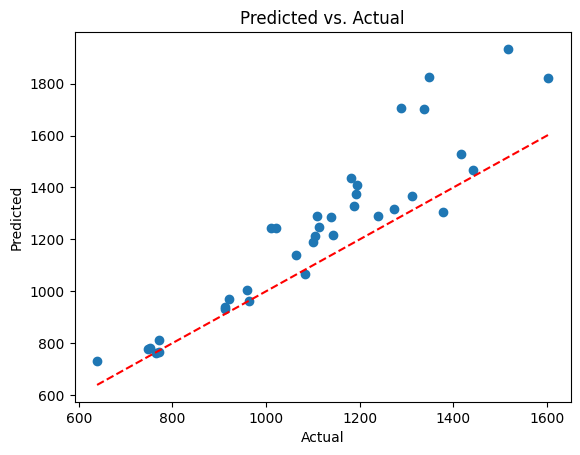

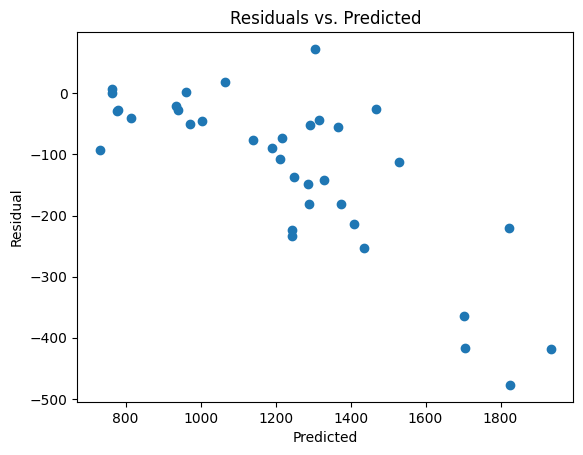

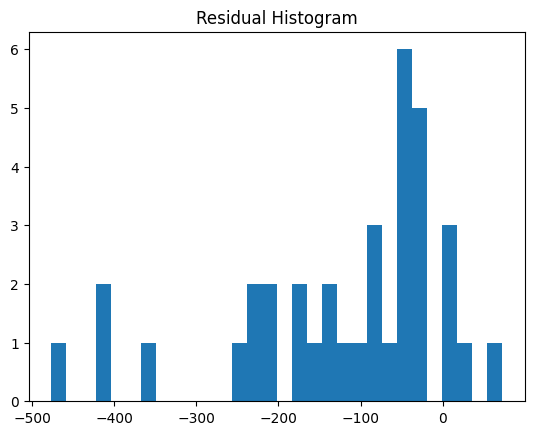

        Coefficient        P-Value
const  1.233043e+03  1.106409e-193
x1    -1.056327e-14   1.027121e-03
x2     5.726273e+00   5.265691e-01
x3     1.491092e+00   8.618014e-01
x4     2.946162e+02   2.092811e-86
x5     3.593430e+01   3.288909e-05


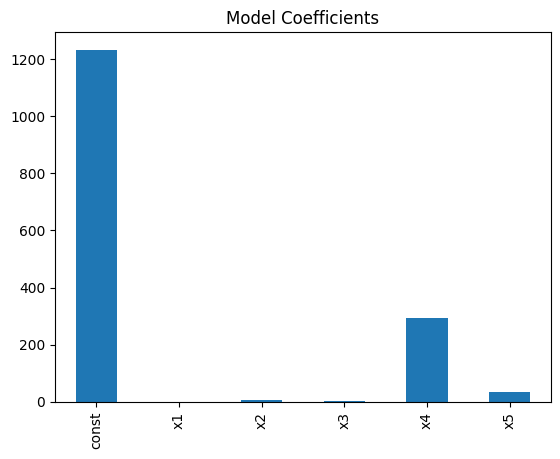

In [15]:
#lets plot the predictions against the actual values
plt.scatter(y_validierung, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_validierung.min(), y_validierung.max()], [y_validierung.min(), y_validierung.max()], 'k--', color="red")
plt.title('Predicted vs. Actual')
plt.show()

#berechnung der residuals
residuals = y_validierung - predictions
plt.scatter(predictions, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.title('Residuals vs. Predicted')
plt.show()

#histogramm der residuals
plt.hist(residuals, bins=30)
plt.title('Residual Histogram')
plt.show()

#data frame of model coefficients
coefficients = pd.DataFrame(model.params, columns=['Coefficient'])
coefficients['P-Value'] = model.pvalues
print(coefficients)

#bar plot of coefficients
coefficients['Coefficient'].plot(kind='bar')
plt.title('Model Coefficients')
plt.show()

In [ ]:
#import the training and validation data
train = pd.read_csv('../../0_DataPreparation/Trainingsdaten.csv')
#convert the ship colum from True and False to 1 and 0
train['Ship'] = train['Ship'].astype(int)
#add a colum with true/false for the day before a Feiertag
train['Feiertag-1'] = train['Feiertag'].shift(1)

from itertools import combinations

features = ['Ship', 'Feiertag', 'Feiertag-1', 'Croissant', 'Konditorei']

#i want to create a function that will find the model with the best mape for a given set of features
def find_best_model(data, features):
    best_mape = float('inf')
    best_model = None
    for i in range(1, len(features) + 1):
        for combo in combinations(features, i):
            # Remove all rows with missing values
            data = data.dropna()
            # Select the features for the model
            x_train = data[list(combo)]
            y_train = data['Umsatz_total']
            # Scale the features
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            # Add a constant term to the training data for the regression intercept
            x_train = sm.add_constant(x_train)
            # Train the linear regression model using Statsmodels i in range(1, len(features) + 1):
        for combo in combinations(features, i):
            # Remove all rows with missing values
            data = data.dropna()
            # Select the features for the model
            x_train = data[list(combo)]
            y_train = data['Umsatz_total']
            # Scale the features
            scaler = StandardScaler()
            x_train = scaler.fit_transform(x_train)
            # Add a constant term to the training data for the regression intercept
            x_train = sm.add_constant(x_train)
            # Train the linear regression model using Statsmodels
            model = sm.OLS(y_train, x_train).fit()
            # Select the features for the validation data
            x_validierung = data[list(combo)]
            # Scale the features
            x_validierung = scaler.transform(x_validierung)
            # Add constant after scaling
            x_validierung = sm.add_constant(x_validierung)
            y_validierung = data['Umsatz_total']
            # Predict the validation data
            predictions = model.predict(x_validierung)
            # Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
            mape = (abs((y_validierung - predictions) / y_validierung).mean()) * 100
            # Update the best model if the current model is better
            if mape < best_mape:
                best_mape = mape
                best_model = model
    return best_model, best_mape

# Find the best model and its MAPE
best_model, best_mape = find_best_model(train, features)
print(best_model.summary())
print(f"Best MAPE: {best_mape:.2f}%")

   

                            OLS Regression Results                            
Dep. Variable:           Umsatz_total   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     485.7
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           5.15e-86
Time:                        12:36:45   Log-Likelihood:                -1117.5
No. Observations:                 184   AIC:                             2243.
Df Residuals:                     180   BIC:                             2256.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1233.0435      7.831    157.456      0.0

In [ ]:
# Define the features to use for the model
features = ['Ship', 'Feiertag', 'Feiertag-1', 'Croissant', 'Konditorei']
# Find the best model for the given features    
best_model, best_mape = find_best_model(train, features)
# Print the best model and its MAPE
print(best_model.summary())
print(f"Best MAPE: {best_mape:.2f}%")

            model = sm.OLS(y_train, x_train).fit()
            # Select the features for the validation data
            x_validierung = data[list(combo)]
            # Scale the features
            x_validierung = scaler.transform(x_validierung)
            # Add constant after scaling
            x_validierung = sm.add_constant(x_validierung)
            y_validierung = data['Umsatz_total']
            # Predict the validation data
            predictions = model.predict(x_validierung)
            # Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
            mape = (abs((y_validierung - predictions) / y_validierung).mean()) * 100
            # Update the best model if the current model is better
            if mape < best_mape:
                best_mape = mape
                best_model = model
    return best_model, best_mape

# Define the features to use for the model
features = ['Ship', 'Feiertag', 'Feiertag-1', 'Croissant', 'Konditorei']
# Find the best model for the given features    
best_model, best_mape = find_best_model(train, features)
# Print the best model and its MAPE
print(best_model.summary())
print(f"Best MAPE: {best_mape:.2f}%")
